<a href="https://colab.research.google.com/github/kalaij07/Sentiment-analysis-on-social-media-using-BERT-and-XGBOOST-model/blob/main/Final_Year_Project_%22Sentiment_Analysis_for_social_media_using_BERT_Model_and_XGBoost_(Batch_10)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Module 1

---




#**Sentiment analysis for social media using BERT Model and XGBoost**

    Mind map for this project
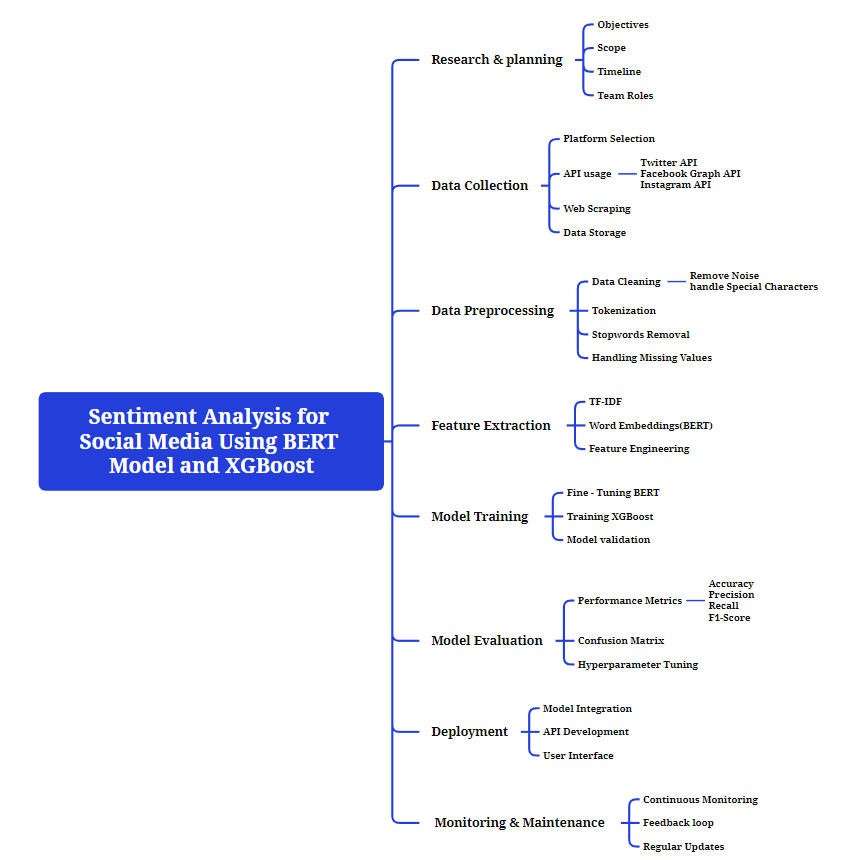

##Mount of Google Drive
###For import data files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data collection process

In [ ]:
import pandas as pd

pre_dataset = pd.read_csv("/content/drive/MyDrive/dataset.csv")
pre_dataset

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [ ]:
#EAA5MvOYZCEFEBOxZCCRfWQ9ClgG3ZCGZBgZBqEHqYCpoYSttPizKDkClPHBbIETZAJanGeY0lv1Fies7oWxtK7BaVrWRzwVRdCvrFYBrpXscW115JtSd9zHtc5JoB0dIZBErqstPnvDv3LOEV2Xhg5U0VLkfYHBkfB3QaZCywlPCbdSp8gZAzk4KBnbimjhdZAwMAlrPaa801SCgGTy874UqZCp2iMEyhfGKQQVfpMbZCMHgx1QnZC3j9zDKlceBcCAZAUAalqWXk3sHsZD

In [ ]:
#EAA5MvOYZCEFEBOyFEpQcMOXZCUAjD1QTu6IcsHw6AVhVJ81zcdI62GZCw8oHEi203Pk2E3tpT42bzdByBuXSV0rI7QJVSz5xbkxFk077ZALp7hh7gPiNHHQOmLO9win0YcGcAktcZB736X3tY6HPL7HYP2ofYtWEAoAhZB6joiLMag6xilzRGKI54bAZAZBuRziTZC68VCn4upJ2QxW4pz3enQX2NuxAZD

In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 7.1 MB/s eta 0:00:00


In [ ]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
import emoji
nltk.download("wordnet")
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Ensure input is a string
    text = str(text)

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove mentions (@user)
    text = re.sub(r'@\S+', '', text)

    # Remove hashtags (#hashtag)
    text = re.sub(r'#\S+', '', text)

    # Remove special characters and numbers (except '!')
    text = re.sub(r'[^a-zA-Z!\s]', '', text)

    # Replace multiple '!' with a single '!'
    text = re.sub(r'!+', '!', text)

    # Remove single characters (but keep meaningful ones like 'I')
    text = re.sub(r'\s+[b-df-hj-np-tv-zB-DF-HJ-NP-TV-Z]\s+', ' ', text)  # Keeps 'I'

    # Remove single characters at the start of words
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)

    # Remove extra whitespace
    text = ' '.join(text.split())

    # Remove prefixed 'b' (byte-string artifacts)
    text = re.sub(r'^b\s+', '', text)

    # Convert FULLY CAPITALIZED words to sentence case
    words = text.split()
    processed_words = [word.capitalize() if word.isupper() else word for word in words]
    text = ' '.join(processed_words)
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])  # Lemmatize words
    text = emoji.demojize(text)  # Convert emojis to text

    return text
pre_dataset['text'] = pre_dataset['text'].apply(clean_text)

In [ ]:
pre_dataset.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,What said,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,plus youve added commercials to the experience...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,I didnt today Must mean I need to take another...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,its really aggressive to blast obnoxious enter...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,and its a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,seriously would pay a flight for seats that di...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,yes nearly every time I fly Vx this ear worm w...,NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,Really missed a prime opportunity for Men With...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,Well I didntbut Now I Do! D,NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,it was amazing and arrived an hour early Youre...,NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [ ]:
print(pre_dataset.text)

0                                                What said
1        plus youve added commercials to the experience...
2        I didnt today Must mean I need to take another...
3        its really aggressive to blast obnoxious enter...
4                  and its a really big bad thing about it
                               ...                        
14635    thank you we got on a different flight to Chicago
14636    leaving over minutes Late Flight No warnings o...
14637                    Please bring American Airlines to
14638    you have my money you change my flight and don...
14639    we have ppl so we need know how many seats are...
Name: text, Length: 14640, dtype: object


In [ ]:
all_text = ''.join(pre_dataset['text'])  # Merge all text into one string
chars = sorted(set(all_text))  # Extract unique characters
vocab_size = len(chars)

print(''.join(chars))  # Print all unique characters
print(vocab_size)  # Print number of unique characters


 !ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
54


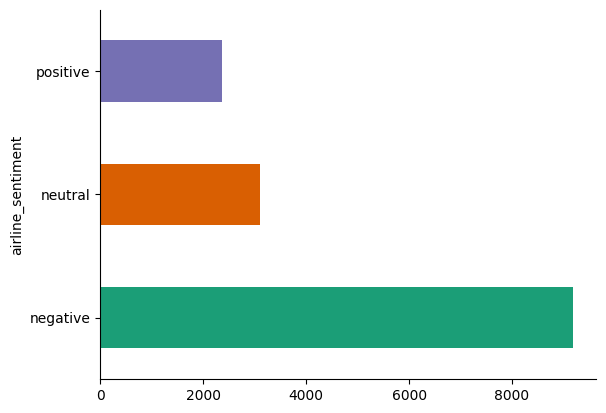

In [ ]:
# @title airline_sentiment

from matplotlib import pyplot as plt
import seaborn as sns
pre_dataset.groupby('airline_sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

#Adding New column on dataset name called (Sentiment)
##In this column have Various sentiment like (sad, happy, sarcasm, irony)

In [ ]:
#!pip install transformers

In [ ]:
#!pip install nltk

In [ ]:
import nltk
nltk.download('vader_lexicon')
nltk.download('sentiwordnet')
nltk.download('punkt_tab')
nltk.download('wordnet')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import sentiwordnet as swn
import pandas as pd
import re

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:


# Create an instance of SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


def analyze_sentiwordnet(text):
  """Analyze sentiment using SentiWordNet."""

  # Tokenize the text (you might need to improve this part)
  tokens = nltk.word_tokenize(text)

  # Calculate sentiment scores for each token
  pos_score = 0
  neg_score = 0

  for token in tokens:
    synsets = list(swn.senti_synsets(token))
    if synsets:
      # Get the first synset (most common meaning)
      synset = synsets[0]
      pos_score += synset.pos_score()
      neg_score += synset.neg_score()

  # Determine overall sentiment based on scores
  if pos_score > neg_score:
    return "happy"
  elif neg_score > pos_score:
    return "sad"
  else:
    return "unknown"  # Neutral or undefined sentiment

#Hybrid Approach (Combine Lexicons for Best Accuracy!)
##Predefined Sentiment Dictionaries
The Hybrid Approach combines multiple sentiment analysis methods to improve accuracy.
It uses:

✅ VADER – Handles social media texts, sarcasm, and irony detection.

✅ SentiWordNet – Provides fine-grained sentiment scoring using a lexical database.

✅ Custom Keyword Matching – Ensures domain-specific sentiment detection (e.g., airline-related words).

Use VADER + SentiWordNet + Custom Keywords together:

###Steps in the Hybrid Approach
Use VADER to detect sentiment from short texts (tweets).
Use SentiWordNet to analyze each word’s positive/negative score.
Check for custom keyword-based sentiment mapping.
Combine the outputs from all three methods to determine the best sentiment label.

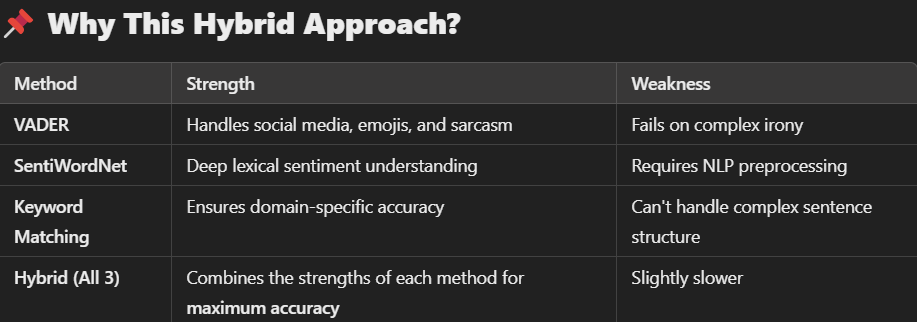


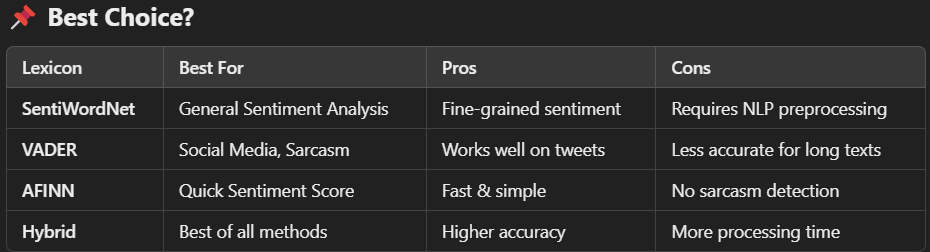

In [ ]:
# Load dataset
df = pre_dataset  # Update with the correct filename

def hybrid_sentiment(text):
    vader_score = analyzer.polarity_scores(text)["compound"]
    sentiword_score = analyze_sentiwordnet(text)

    if vader_score >= 0.5 or sentiword_score == "happy":
        return "happy"
    elif vader_score <= -0.5 or sentiword_score == "sad":
        return "sad"
    else:
        return "sarcasm" if "!" in text or text.isupper() else "irony"

df["sentiment"] = df["text"].apply(hybrid_sentiment)

# Keep only labeled rows (excluding 'unknown')
df = df[df["sentiment"] != "unknown"]
df


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,sentiment
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,What said,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),irony
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,plus youve added commercials to the experience...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),happy
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,I didnt today Must mean I need to take another...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),happy
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,its really aggressive to blast obnoxious enter...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),happy
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,and its a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),sad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,thank you we got on a different flight to Chicago,NaN,2015-02-22 12:01:01 -0800,NaN,NaN,happy
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,leaving over minutes Late Flight No warnings o...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN,sad
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,Please bring American Airlines to,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN,happy
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,you have my money you change my flight and don...,NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada),happy


In [ ]:
'''# Save the filtered dataset for training
df.to_csv("processed_sentiment_dataset.csv", index=False)
print("Done ")'''

Done 


In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,sentiment
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,What said,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),irony
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,plus youve added commercials to the experience...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),happy
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,I didnt today Must mean I need to take another...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),happy
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,its really aggressive to blast obnoxious enter...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),happy
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,and its a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),sad


In [ ]:
df.shape

(14640, 16)

In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,sentiment
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,What said,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),irony
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,plus youve added commercials to the experience...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),happy
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,I didnt today Must mean I need to take another...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),happy
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,its really aggressive to blast obnoxious enter...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),happy
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,and its a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),sad


In [ ]:
# Count each sentiment category
sentiment_counts = df['sentiment'].value_counts()

# Print the count for each label
print(sentiment_counts)


sentiment
happy      8076
sad        4549
irony      1682
sarcasm     333
Name: count, dtype: int64


In [ ]:
df.shape

(14640, 16)

In [ ]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [ ]:
df.isnull().sum()

,0
tweet_id,0
airline_sentiment,0
airline_sentiment_confidence,0
negativereason,5462
negativereason_confidence,4118
airline,0
airline_sentiment_gold,14600
name,0
negativereason_gold,14608
retweet_count,0


<ipython-input-29-1f263041087d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


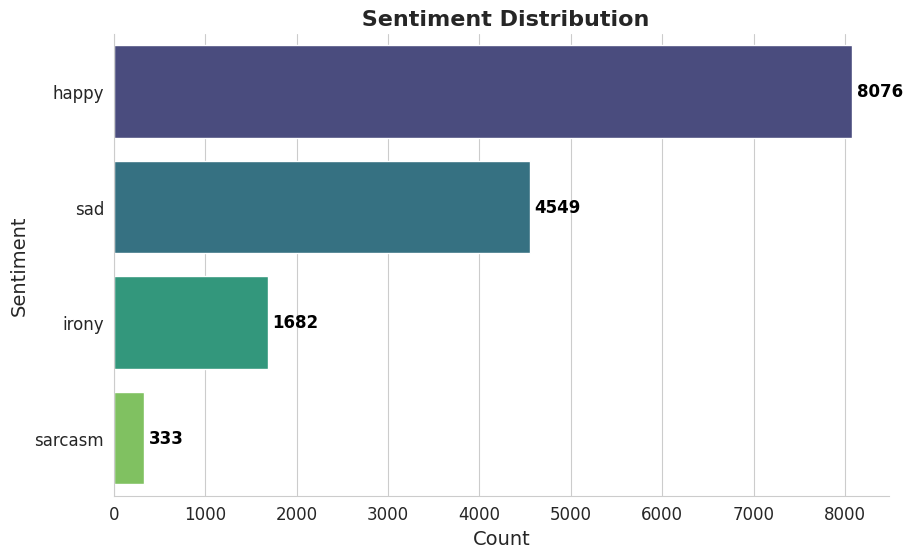

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Define a vibrant color palette
colors = sns.color_palette("viridis", len(df['sentiment'].unique()))

# Plot horizontal bar chart
ax = sns.barplot(
    x=df['sentiment'].value_counts().values,
    y=df['sentiment'].value_counts().index,
    palette=colors
)

# Add value labels on bars
for i, v in enumerate(df['sentiment'].value_counts().values):
    ax.text(v + 50, i, str(v), color='black', fontsize=12, fontweight='bold', va="center")

# Customize chart aesthetics
plt.title(" Sentiment Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Count", fontsize=14)
plt.ylabel("Sentiment", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().spines[['top', 'right']].set_visible(False)  # Remove top & right borders

# Show the plot
plt.show()


In [ ]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone', 'sentiment'],
      dtype='object')

# End of df

---



In [ ]:
bal_df = pd.read_csv("/content/drive/MyDrive/processed_sentiment_dataset_fully_balanced_final.csv")
bal_df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,sentiment
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0.0,What said,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),irony
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0.0,plus youve added commercials to the experience...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),happy
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0.0,I didnt today Must mean I need to take another...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),happy
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0.0,its really aggressive to blast obnoxious enter...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),happy
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0.0,and its a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),sad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32299,570310600460543228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I wish things were different.,NaN,NaN,NaN,NaN,sad
32300,570310600460543229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I wish things were different.,NaN,NaN,NaN,NaN,sad
32301,570310600460543230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,It hurts to feel this way.,NaN,NaN,NaN,NaN,sad
32302,570310600460543231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Sometimes, life just feels so heavy.",NaN,NaN,NaN,NaN,sad


# **Resampling of the dataset because of imbalanced data labels**

In [ ]:
bal_df_val_counts = bal_df['sentiment'].value_counts()
print(bal_df_val_counts)

sentiment
irony      8076
happy      8076
sad        8076
sarcasm    8076
Name: count, dtype: int64


In [ ]:
bal_df.shape

(32304, 16)

In [ ]:
bal_df.count()

,0
tweet_id,32304
airline_sentiment,14640
airline_sentiment_confidence,14640
negativereason,9178
negativereason_confidence,10522
airline,14640
airline_sentiment_gold,40
name,14640
negativereason_gold,32
retweet_count,14640


In [ ]:
print(bal_df['text'])

0                                                What said
1        plus youve added commercials to the experience...
2        I didnt today Must mean I need to take another...
3        its really aggressive to blast obnoxious enter...
4                  and its a really big bad thing about it
                               ...                        
32299                        I wish things were different.
32300                        I wish things were different.
32301                           It hurts to feel this way.
32302                 Sometimes, life just feels so heavy.
32303               Some days are just too hard to handle.
Name: text, Length: 32304, dtype: object


In [ ]:
bal_df['text'].duplicated().drop_duplicates()

,text
0,False
110,True


In [ ]:
bal_df_val_counts = bal_df['text'].value_counts()
print(bal_df_val_counts)

text
Amazing, because that's totally helpful!                                                       817
Perfect, because this couldn't get any better!                                                 792
Fantastic, I love when this happens!                                                           791
Incredible, this is going straight to the history books!                                       789
Wow, this is just what I needed today!                                                         783
                                                                                              ... 
I have a child traveling cross countryshes will be turning in marchand cont                      1
how do you get one                                                                               1
retiring with my hubby and its our th wedding anniversary this year! Companion pass please!      1
beautiful view flying into San Jose Ca this evening                                              1
why d

In [ ]:
bal_df_val_counts = bal_df['sentiment'].value_counts()
print(bal_df_val_counts)

sentiment
irony      8076
happy      8076
sad        8076
sarcasm    8076
Name: count, dtype: int64


In [ ]:
bal_df.count()

,0
tweet_id,32304
airline_sentiment,14640
airline_sentiment_confidence,14640
negativereason,9178
negativereason_confidence,10522
airline,14640
airline_sentiment_gold,40
name,14640
negativereason_gold,32
retweet_count,14640


In [ ]:
'''new_data=pd.read_csv('/kaggle/input/social-media-sentiments-analysis-dataset/sentimentdataset.csv')
new_data.to_csv('sentimentdataset.csv', index=False)'''

"new_data=pd.read_csv('/kaggle/input/social-media-sentiments-analysis-dataset/sentimentdataset.csv')\nnew_data.to_csv('sentimentdataset.csv', index=False)"

<ipython-input-24-b5894dc946d2>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=bal_df_val_counts.values,


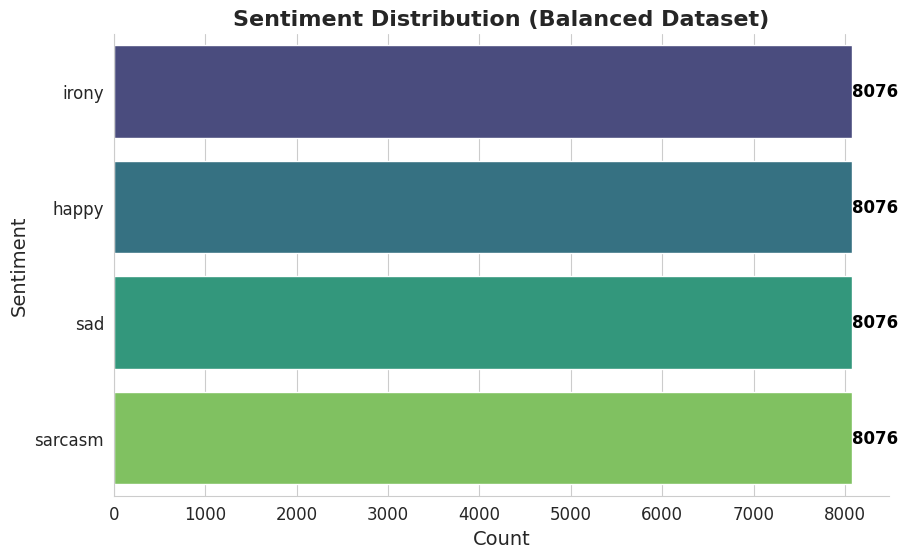

In [ ]:
# prompt: bal_df_val_counts = bal_df['sentiment'].value_counts()
# print(bal_df_val_counts)
# plot this and using seaborn

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming bal_df_val_counts is already defined as in your provided code
# bal_df_val_counts = bal_df['sentiment'].value_counts()

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
colors = sns.color_palette("viridis", len(bal_df_val_counts))

ax = sns.barplot(x=bal_df_val_counts.values,
                 y=bal_df_val_counts.index,
                 palette=colors)

for i, v in enumerate(bal_df_val_counts.values):
    ax.text(v + 0.1, i, str(v), color='black', fontsize=12, fontweight='bold', va='center')


plt.title("Sentiment Distribution (Balanced Dataset)", fontsize=16, fontweight='bold')
plt.xlabel("Count", fontsize=14)
plt.ylabel("Sentiment", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


In [ ]:
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

print(encode("hii there"))
print(decode(encode("hii there")))

[35, 36, 36, 0, 47, 35, 32, 45, 32]
hii there


In [ ]:
# Select only the required columns
bal_df = bal_df[['text', 'sentiment']]

# Display the first few rows
print(bal_df.head())


                                                text sentiment
0                                          What said     irony
1  plus youve added commercials to the experience...     happy
2  I didnt today Must mean I need to take another...     happy
3  its really aggressive to blast obnoxious enter...     happy
4            and its a really big bad thing about it       sad


# Model training process

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

new_df = pd.read_csv('/content/final_balanced_sentiment_dataset.csv')
print(new_df.shape)
display(new_df.head())

(32273, 16)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,sentiment
0,5.703061e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0.0,What said,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),irony
1,5.703011e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0.0,plus youve added commercials to the experience...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),happy
2,5.703011e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0.0,I didnt today Must mean I need to take another...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),happy
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0.0,its really aggressive to blast obnoxious enter...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),happy
4,5.703008e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0.0,and its a really big bad thing about it This i...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),sad



Text Length Statistics:
Average: 63.44027515260434
Minimum: 5
Maximum: 174


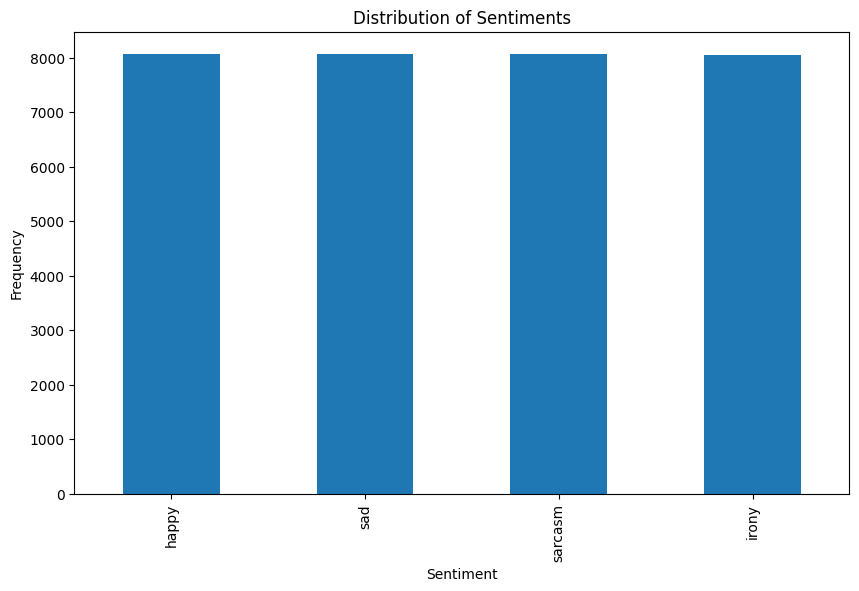

In [ ]:
# Drop rows with missing values in the 'text' column.
new_df.dropna(subset=['text'], inplace=True)

# Examine the length of the text data
new_df['text_length'] = new_df['text'].apply(len)
print("\nText Length Statistics:")
print("Average:", new_df['text_length'].mean())
print("Minimum:", new_df['text_length'].min())
print("Maximum:", new_df['text_length'].max())

# Visualize the distribution of sentiments
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
new_df['sentiment'].value_counts().plot(kind='bar')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

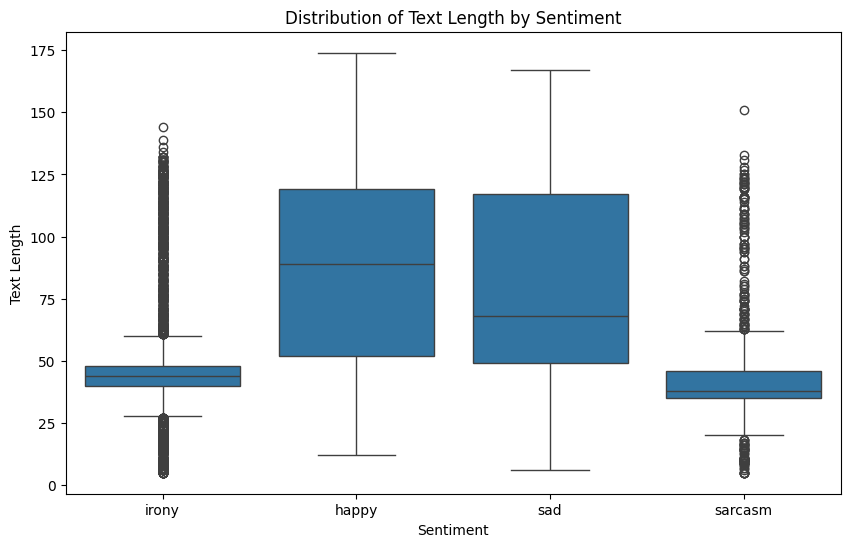

Outliers for sentiment 'irony':
0          9
17         8
30        77
45         5
64        62
        ... 
13356     88
13359    127
13374    109
13378    100
13380    125
Name: text_length, Length: 1145, dtype: int64

Outliers for sentiment 'happy':
Series([], Name: text_length, dtype: int64)

Outliers for sentiment 'sad':
Series([], Name: text_length, dtype: int64)

Outliers for sentiment 'sarcasm':
39        86
57         7
171       16
179        9
218       13
        ... 
13217     72
13232     66
13239    104
13266    133
13302     95
Name: text_length, Length: 207, dtype: int64



In [ ]:
# prompt: above code is visible that plot shows the all are same in there level i want to analysis outliers to clean it

import matplotlib.pyplot as plt
import seaborn as sns
# ... (Your existing code) ...

# Visualize the distribution of sentiments with box plot to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='text_length', data=new_df)
plt.title('Distribution of Text Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Text Length')
plt.show()

# Identify outliers based on IQR (Interquartile Range)
def identify_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Analyze outliers for each sentiment category
for sentiment in new_df['sentiment'].unique():
    sentiment_data = new_df[new_df['sentiment'] == sentiment]['text_length']
    outliers = identify_outliers(sentiment_data)
    print(f"Outliers for sentiment '{sentiment}':\n{outliers}\n")

# You can choose to remove the outliers based on your analysis
# For example, you can create a new DataFrame without the outliers:
# new_df_cleaned = new_df[~new_df['text_length'].isin(outliers.index)]

# ... (Rest of your code) ...


In [ ]:
import pandas as pd

# Assuming new_df is already loaded
new_df['text_length'] = new_df['text'].str.len()

# Determine outlier limits (e.g., 1st and 99th percentile)
low_limit, high_limit = new_df['text_length'].quantile([0.01, 0.99])

# Filter data within limits
filtered_df = new_df[(new_df['text_length'] >= low_limit) & (new_df['text_length'] <= high_limit)]

# Drop the extra column after filtering
filtered_df = filtered_df.drop(columns=['text_length'])

# Check sentiment balance
print(filtered_df['sentiment'].value_counts(normalize=True))

# Save cleaned dataset
filtered_df.to_csv('cleaned_sentiment_data.csv', index=False)


sentiment
sarcasm    0.252367
happy      0.251989
sad        0.248327
irony      0.247317
Name: proportion, dtype: float64


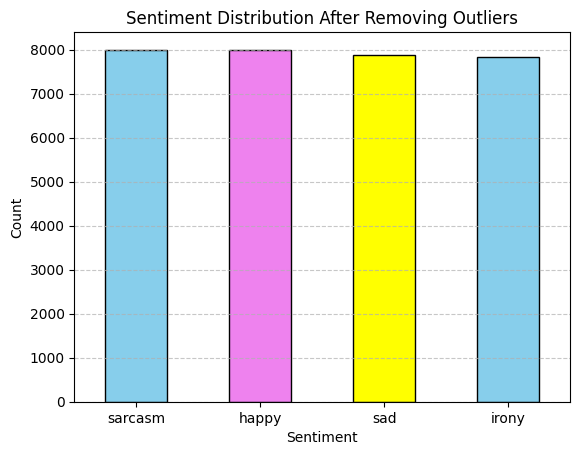

In [ ]:
import matplotlib.pyplot as plt

# Plot sentiment distribution
filtered_df['sentiment'].value_counts().plot(kind='bar', color=['skyblue', 'violet', 'yellow'], edgecolor='black')

# Customize the chart
plt.title('Sentiment Distribution After Removing Outliers')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.show()


In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 11.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which i

In [ ]:
import pandas as pd
import numpy as np
import re
import torch
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report
from transformers import AutoTokenizer, AutoModel
from tqdm import tqdm
from xgboost import XGBClassifier


In [ ]:
# 2. Data Preprocessing
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z0-9 ]', '', text)
    text = text.strip()
    return text

new_df['clean_text'] = new_df['text'].astype(str).apply(clean_text)

In [ ]:
# Examine the shape of the DataFrame
print("DataFrame Shape:", new_df.shape)

# Check for missing values
print("\nMissing Values:\n", new_df.isnull().sum())

# Analyze the distribution of sentiments
print("\nSentiment Distribution:\n", new_df['sentiment'].value_counts())

# Examine the length of the text data
new_df['text_length'] = new_df['text'].apply(len)
print("\nText Length Statistics:")
print("Average:", new_df['text_length'].mean())
print("Minimum:", new_df['text_length'].min())
print("Maximum:", new_df['text_length'].max())

DataFrame Shape: (32273, 18)

Missing Values:
 tweet_id                         1222
airline_sentiment               18886
airline_sentiment_confidence    18886
negativereason                  24073
negativereason_confidence       22818
airline                         18886
airline_sentiment_gold          32235
name                            18886
negativereason_gold             32243
retweet_count                   18886
text                                0
tweet_coord                     31340
tweet_created                   18886
tweet_location                  23191
user_timezone                   23304
sentiment                           0
text_length                         0
clean_text                          0
dtype: int64

Sentiment Distribution:
 sentiment
happy      8076
sad        8076
sarcasm    8076
irony      8045
Name: count, dtype: int64

Text Length Statistics:
Average: 63.44027515260434
Minimum: 5
Maximum: 174


In [ ]:
# Identify potential outliers or anomalies in text length
print("\nText Length Outliers (Top 10 longest):")
print(new_df.sort_values('text_length', ascending=False)['text'].head(10))
print("\nText Length Outliers (Top 10 shortest):")
print(new_df.sort_values('text_length', ascending=True)['text'].head(10))



Text Length Outliers (Top 10 longest):
10701    My Flight Booking Problems Cld just times out ...
629      we were not given the option of using our Unit...
11177    When Flight Booking Problems an intl flight on...
7556     here in Austin I saw the water bottles amp sna...
7675     Hey guys! Your Flight Booking Problems system ...
6866     When I got your alert I immediately started lo...
9188     spent hours in line trying to get on a flight ...
12214    I tried that amp they have been disrespectful ...
1527     every time I search a flight your site logs me...
1821     no ua finally Cancelled Flighted after hrs of ...
Name: text, dtype: object

Text Length Outliers (Top 10 shortest):
6452     lolol
45       Dream
4018     sent!
11612    yikes
2735     thnx!
6614     Gerne
11788    amen!
7061     flite
7158     cough
10902    I did
Name: text, dtype: object


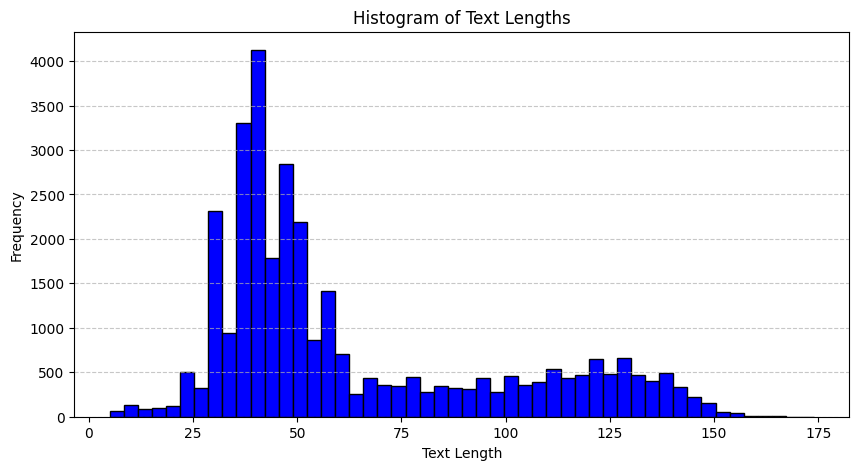

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(new_df['text_length'], bins=50, color='blue', edgecolor='black')

plt.title('Histogram of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from transformers import BertTokenizer

# Download stopwords if not already downloaded
nltk.download('stopwords', quiet=True)

# Initialize BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def preprocess_text(text):
  """Preprocesses the text data."""
  text = clean_text(text)
  tokens = tokenizer.tokenize(text)
  return tokens

# Apply preprocessing to the 'text' column
new_df['processed_text'] = new_df['text'].apply(preprocess_text)

# Display the first few rows with processed text
display(new_df[['text', 'processed_text']].head())

,text,processed_text
0,What said,"[what, said]"
1,plus youve added commercials to the experience...,"[plus, you, ##ve, added, commercials, to, the,..."
2,I didnt today Must mean I need to take another...,"[i, didn, ##t, today, must, mean, i, need, to,..."
3,its really aggressive to blast obnoxious enter...,"[its, really, aggressive, to, blast, ob, ##no,..."
4,and its a really big bad thing about it This i...,"[and, its, a, really, big, bad, thing, about, ..."


In [ ]:
# 3. Train-Test Split
train_texts, test_texts, train_labels, test_labels = train_test_split(
new_df['clean_text'], new_df['sentiment'], test_size=0.2, random_state=42, stratify=new_df['sentiment']
)

In [ ]:
# 4. Load BERT Model & Tokenizer
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name, output_hidden_states=True)
model.eval()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

def generate_bert_embeddings_batch(texts, batch_size=32):
    """Generates BERT embeddings for a batch of texts."""
    embeddings = []
    for i in tqdm(range(0, len(texts), batch_size), desc="Processing Batches"):
        batch_texts = texts[i:i+batch_size]
        encoded_input = tokenizer(batch_texts, add_special_tokens=True, padding=True, truncation=True, max_length=512, return_tensors='pt')
        encoded_input = {k: v.to(device) for k, v in encoded_input.items()}

        with torch.no_grad():
            outputs = model(**encoded_input)

        batch_embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()
        embeddings.extend(batch_embeddings)

    return np.array(embeddings)


In [ ]:
# 5. Convert text data into BERT features
X_train = generate_bert_embeddings_batch(train_texts.tolist(), batch_size=32)
X_test = generate_bert_embeddings_batch(test_texts.tolist(), batch_size=32)

Processing Batches:   2%|▏         | 19/807 [01:30<1:02:20,  4.75s/it]


KeyboardInterrupt: 

In [ ]:
# 6. Convert Labels to Numeric
label_map = {label: i for i, label in enumerate(df['sentiment'].unique())}
y_train = train_labels.map(label_map)
y_test = test_labels.map(label_map)

In [ ]:
# 7. Train XGBoost Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',n_estimators=500,  # Increase trees
    learning_rate=0.03,  # Reduce learning rate
    max_depth=8,  # Deeper trees
    subsample=0.8,  # Reduce overfitting
    colsample_bytree=0.8  # Feature selection
    )
xgb_model.fit(X_train, y_train)

# Evaluate XGBoost Model

In [ ]:
# 8.
xgb_preds = xgb_model.predict(X_test)
print("XGBoost with BERT Features - Classification Report:")
print(classification_report(y_test, xgb_preds))

In [ ]:
# 9. Train BERT Model
train_dataset = Dataset.from_pandas(pd.DataFrame({"text": train_texts, "label": y_train}))
test_dataset = Dataset.from_pandas(pd.DataFrame({"text": test_texts, "label": y_test}))

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

bert_classification_model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=len(label_map))
training_args = TrainingArguments(
    output_dir="./results", evaluation_strategy="epoch", per_device_train_batch_size=8, per_device_eval_batch_size=8, num_train_epochs=3, weight_decay=0.01
)

trainer = Trainer(
    model=bert_classification_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

trainer.train()

# 10. Evaluate BERT Model
preds = trainer.predict(test_dataset)
pred_labels = np.argmax(preds.predictions, axis=1)
print("BERT Classification Report:")
print(classification_report(y_test, pred_labels))

In [ ]:
from sklearn.model_selection import train_test_split
X = new_df['bert_embeddings'].values.tolist()  # BERT embeddings as features
y = new_df['sentiment'].values  # Sentiment labels as target

# Split into train and test sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split train set into train and validation sets (adjust test_size as needed)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


In [ ]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import numpy as np

# Convert BERT embeddings to NumPy array
X_train = np.array(X_train).reshape(len(X_train), -1)
X_val = np.array(X_val).reshape(len(X_val), -1)
X_test = np.array(X_test).reshape(len(X_test), -1)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Convert to XGBoost DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train_encoded)
dval = xgb.DMatrix(X_val, label=y_val_encoded)
dtest = xgb.DMatrix(X_test, label=y_test_encoded)

# Optimized XGBoost parameters
params = {
    'objective': 'multi:softmax',
    'num_class': len(label_encoder.classes_),
    'eval_metric': 'merror',
    'eta': 0.05,  # Reduce learning rate for better convergence
    'max_depth': 8,  # Increase depth to capture more patterns
    'subsample': 0.9,  # Use more training data per tree
    'colsample_bytree': 0.9,  # Use more features per tree
    'min_child_weight': 3,  # Prevent overfitting
}
num_rounds = 200  # 🔥 More boosting rounds (from 100 to 200)


# Train with early stopping
xgb_model = xgb.train(
    params, dtrain, num_rounds,
    evals=[(dval, 'validation')],
    early_stopping_rounds=10  # 🔥 Stops if no improvement for 20 rounds
)


# Predict on test set
predictions = xgb_model.predict(dtest)

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, predictions)
print(f"✅ Optimized Accuracy: {accuracy:.4f}")


[0]	validation-merror:0.20084
[1]	validation-merror:0.18450
[2]	validation-merror:0.18191
[3]	validation-merror:0.18126
[4]	validation-merror:0.18013
[5]	validation-merror:0.17964
[6]	validation-merror:0.17624
[7]	validation-merror:0.17511
[8]	validation-merror:0.17414
[9]	validation-merror:0.17495
[10]	validation-merror:0.17381
[11]	validation-merror:0.17430
[12]	validation-merror:0.17203
[13]	validation-merror:0.17381
[14]	validation-merror:0.17381
[15]	validation-merror:0.17252
[16]	validation-merror:0.17414
[17]	validation-merror:0.17414
[18]	validation-merror:0.17025
[19]	validation-merror:0.16993
[20]	validation-merror:0.17106
[21]	validation-merror:0.17139
[22]	validation-merror:0.17123
[23]	validation-merror:0.17042
[24]	validation-merror:0.16944
[25]	validation-merror:0.16977
[26]	validation-merror:0.17009
[27]	validation-merror:0.16864
[28]	validation-merror:0.16961
[29]	validation-merror:0.16961
[30]	validation-merror:0.16766
[31]	validation-merror:0.16718
[32]	validation-me

In [ ]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# ... (your existing code for loading, preprocessing, training, and prediction) ...

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_encoded, predictions)
precision = precision_score(y_test_encoded, predictions, average='weighted')  # Use weighted average for multi-class
recall = recall_score(y_test_encoded, predictions, average='weighted')
f1 = f1_score(y_test_encoded, predictions, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.8317152103559871
Precision: 0.8571515600206848
Recall: 0.8317152103559871
F1-score: 0.8353922522638777


In [ ]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import numpy as np

# ... (your existing code for loading, preprocessing, training, and prediction) ...

# Generate classification report
report = classification_report(y_test_encoded, predictions, target_names=label_encoder.classes_)

# Print the report with custom formatting
print(f"Validation Accuracy: {accuracy:.4f}\n") # Assuming you have 'accuracy' calculated
print(report)

Validation Accuracy: 0.8317

              precision    recall  f1-score   support

       happy       0.63      0.87      0.73      1523
       irony       0.98      0.85      0.91      1591
         sad       0.81      0.63      0.71      1488
     sarcasm       1.00      0.96      0.98      1578

    accuracy                           0.83      6180
   macro avg       0.85      0.83      0.83      6180
weighted avg       0.86      0.83      0.84      6180



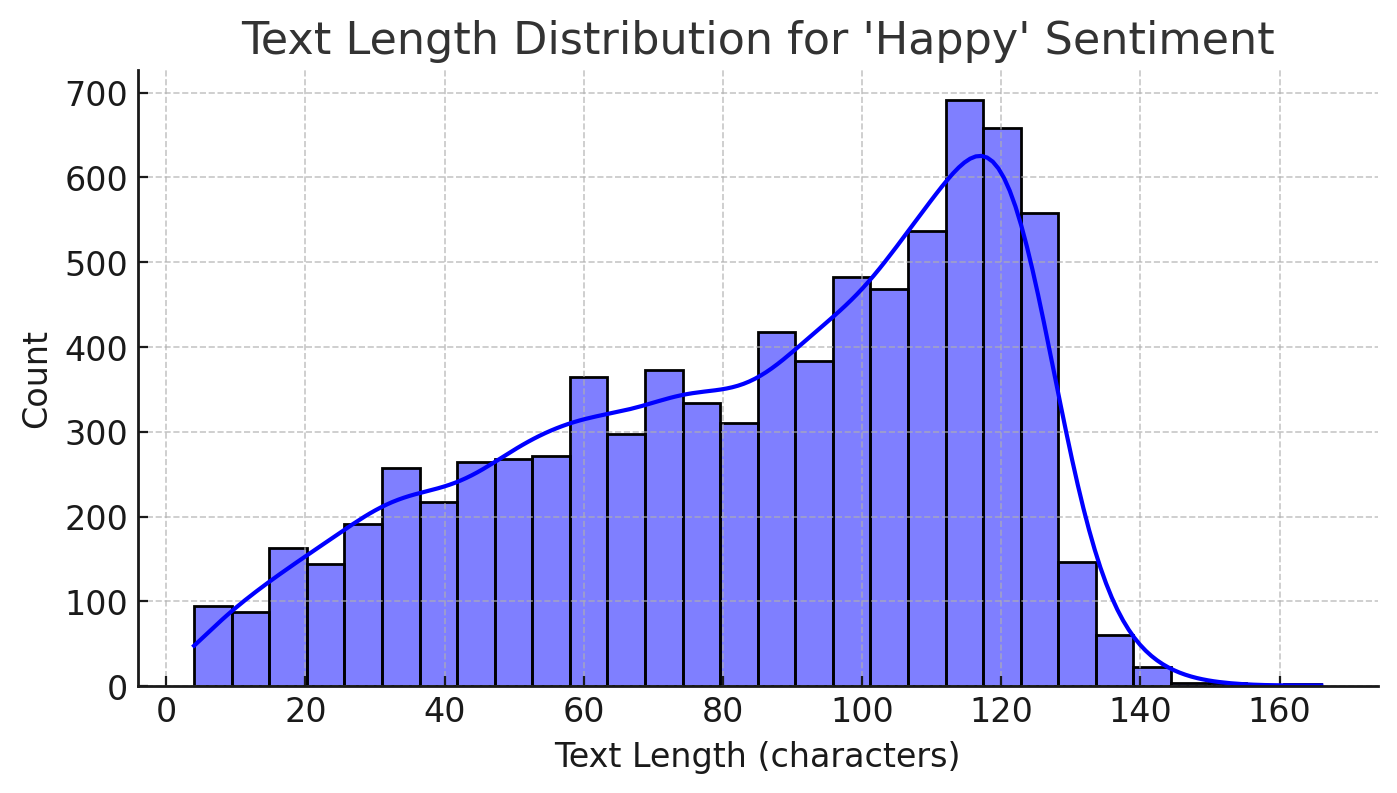